In [1]:
import glob
import csv
import os
from tsne import bh_sne
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedKFold                                                                                                                       
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm

import numpy as np
from numpy.random import RandomState
np.random.seed(1)

In [2]:
flist = glob.glob("train/*.bytes")

In [3]:
num_samples = len(flist)
print("Number of samples: %i" %(num_samples))

Number of samples: 10868


In [4]:
flist

['train/2jf7mkt8YCUM3AriKVas.bytes',
 'train/3oMQAPEXqKpiBlHvOJYz.bytes',
 'train/AxMQBldJRotHf69j32PG.bytes',
 'train/27o93DUCHcGPXdTxlNwg.bytes',
 'train/kaz4GujLsES3IDtnXc10.bytes',
 'train/9gBVZNKoIPkFM8vOp45G.bytes',
 'train/jvGIm6Yu2XKcE8hr4gMy.bytes',
 'train/aZKEkJF7CQtNSDf64d0P.bytes',
 'train/7cA9IVu3YOH5r8hK42wD.bytes',
 'train/3ftwoRhscPpNCxdlIbrU.bytes',
 'train/hGrRVejLFzNtXcBW6s2p.bytes',
 'train/5fsyaH409vx3SUXN2jOq.bytes',
 'train/7RVrih9gAL1FodIKNTc2.bytes',
 'train/l3iRBsCVb4Z81TLNxSgM.bytes',
 'train/HZI8SimVhNLz1JD5fbyW.bytes',
 'train/hrMLJ7DFIfmUGPB2q8y1.bytes',
 'train/DkNYd806tFbgoJ4zf1UA.bytes',
 'train/je3Im0RAozk8M7gnlXiO.bytes',
 'train/i5XIeh8WyrO79NklcwBJ.bytes',
 'train/gPUaRd12vzpH7lkV5DhG.bytes',
 'train/FalYuVzr8LgtiKRZ9oEy.bytes',
 'train/JVdaIxt2DBu8Ez0cH5gY.bytes',
 'train/IBEoqZCidDj8LlUGg6u9.bytes',
 'train/aM4JPZrzBXhgSCF8UTVb.bytes',
 'train/4BrHgYquho9skZMR06ea.bytes',
 'train/3k1meX0gV2WMjAvGDrCq.bytes',
 'train/dZv5FgTBxasz7GMhKRSL.bytes',
 

In [5]:
filename = 'Microsoft-byte12gram.npy'
if os.path.exists(filename):
    print("Loading byte12gram features from %s ..." %(filename))
    X = np.load(filename)
else:
    print("Extracting byte12gram features ...")
    vectorizer = CountVectorizer(input='filename', ngram_range=(1, 2), stop_words=None, token_pattern=r'\b\w\w\b', min_df=1)
    X = vectorizer.fit_transform(flist)
    X = X.todense()
    print("Saving byte12gram features into %s ..." %(filename))
    np.save(filename, X)

Loading byte12gram features from Microsoft-byte12gram.npy ...


In [6]:
X.shape

(10868, 65792)

In [7]:
X

array([[ 11315,   6224,     45, ...,     13,     16,    233],
       [ 14410,   6620,     54, ...,     26,     40,     83],
       [ 43549,  21554,    717, ...,     28,     39,   7395],
       ..., 
       [  6528,   2732,     27, ...,      5,      2,     25],
       [633137, 291225,   1599, ...,      7,      8,    642],
       [ 17820,  11700,    167, ...,      2,      0,    758]])

In [8]:
trainLabelFile = "trainLabels.csv"
with open(trainLabelFile) as f:
    labelDict = dict(filter(None, csv.reader(f)))
    
y = np.zeros(num_samples)
pos = 0
for f in flist:
    fname = os.path.splitext(os.path.basename(f))[0]
    print("File: %s - Class: %s" %(fname,labelDict[fname]))
    y[pos] = int(labelDict[fname])
    pos += 1

File: 2jf7mkt8YCUM3AriKVas - Class: 3
File: 3oMQAPEXqKpiBlHvOJYz - Class: 3
File: AxMQBldJRotHf69j32PG - Class: 2
File: 27o93DUCHcGPXdTxlNwg - Class: 3
File: kaz4GujLsES3IDtnXc10 - Class: 1
File: 9gBVZNKoIPkFM8vOp45G - Class: 2
File: jvGIm6Yu2XKcE8hr4gMy - Class: 3
File: aZKEkJF7CQtNSDf64d0P - Class: 4
File: 7cA9IVu3YOH5r8hK42wD - Class: 9
File: 3ftwoRhscPpNCxdlIbrU - Class: 2
File: hGrRVejLFzNtXcBW6s2p - Class: 8
File: 5fsyaH409vx3SUXN2jOq - Class: 8
File: 7RVrih9gAL1FodIKNTc2 - Class: 1
File: l3iRBsCVb4Z81TLNxSgM - Class: 4
File: HZI8SimVhNLz1JD5fbyW - Class: 9
File: hrMLJ7DFIfmUGPB2q8y1 - Class: 1
File: DkNYd806tFbgoJ4zf1UA - Class: 8
File: je3Im0RAozk8M7gnlXiO - Class: 2
File: i5XIeh8WyrO79NklcwBJ - Class: 1
File: gPUaRd12vzpH7lkV5DhG - Class: 3
File: FalYuVzr8LgtiKRZ9oEy - Class: 2
File: JVdaIxt2DBu8Ez0cH5gY - Class: 6
File: IBEoqZCidDj8LlUGg6u9 - Class: 3
File: aM4JPZrzBXhgSCF8UTVb - Class: 1
File: 4BrHgYquho9skZMR06ea - Class: 3
File: 3k1meX0gV2WMjAvGDrCq - Class: 3
File: dZv5Fg

File: DM4TcmxWagnhX3658jBN - Class: 3
File: cDa5BKpzw9GqnArQfZ1L - Class: 7
File: 5QCveEYAaMzqTJjyhl7L - Class: 3
File: gaVPCzINmME7huA8cjR2 - Class: 3
File: 7z8YaOovircnH5DZxyFC - Class: 2
File: EYJryk0oKhPwRNbWuIUz - Class: 4
File: 3JI42LUuZET9tgvlYDqx - Class: 3
File: gbpQC3mJrM0Ho418PR7W - Class: 1
File: 9sPtSV8rx5WNUukQ4qln - Class: 2
File: FpJWSLn8DkwZKyAG9XxM - Class: 7
File: 8TAOkFtnREagx32HGdKq - Class: 3
File: gvbqrcCMfOkaXx8J9FUe - Class: 8
File: BXVCZF5arGuDLKxWgSsi - Class: 3
File: ekRZWI15vJCVP3iBYjld - Class: 4
File: hOuU4H27YSEGojD8aBQ6 - Class: 8
File: DwyNaEk0S4769ocfPOzn - Class: 2
File: 7suvOYcA5hQI4Zk1HtMo - Class: 2
File: CQBGfcqo9wWzUVDA2smx - Class: 2
File: erlV013gWhMmwGpUICZX - Class: 3
File: 1iWTJCzlSZgempU2xf04 - Class: 7
File: bfY2xBJKmhHdVjPu9FLM - Class: 3
File: cA69YZFTVMzJpEKiSu0C - Class: 8
File: fW4MkhBrUcioN7TOa6by - Class: 2
File: 6VXAjpZbgU4nOc98z0aK - Class: 6
File: cdk9u0beg4S6Tnf5yhR2 - Class: 2
File: dqnMpW16rSHeyCbQ29v3 - Class: 3
File: 9lIdfH

File: 8LYk4IBDwS3luAEK6Vsb - Class: 9
File: ietZ2N7g30pfdSvn6OxI - Class: 2
File: auJL2IBelRMpwS7hKcmU - Class: 1
File: G8wlLJNegZjoD7YFkiS6 - Class: 2
File: DvCqbn37xi5YRwaP19NJ - Class: 8
File: j1f9O7g3wFBd5GqlKNML - Class: 6
File: fYECMU3kwa4u1rgtNPod - Class: 8
File: 0RSW8EmilbznyYPIrgvD - Class: 3
File: 8QoDEdi6Yw2kUmzuNAcp - Class: 2
File: hOtXLq9on7svPe4NTpAd - Class: 3
File: eKxCrcXGDFVfRYtA0JMg - Class: 1
File: AXKWcOFlx5MNa7L6Rr4q - Class: 3
File: 2QSCLlPU3ZsVkXFenufD - Class: 3
File: 2F5DOMVLNGfQKePHdwru - Class: 1
File: jZxB2zDWto8UTu6hPENM - Class: 2
File: 60q1Io2usSnJWyNpzDlA - Class: 6
File: emfAXPk3uGVwRaCF9Zgh - Class: 4
File: Ab76U0fJanpo2QwxVN9e - Class: 4
File: BfZpbY7j0PIw3Orygsvq - Class: 3
File: Kfn9jdUWrz5cm03hiu7S - Class: 2
File: 8UNxCZi37AdHnMXy5Pa9 - Class: 2
File: 0J2pOclDKjadkL57eroz - Class: 3
File: iQDcR43OKXIJzT5WV8AH - Class: 3
File: Hl2P1kxawM74dKtuoA9c - Class: 3
File: aeoETp7ktY2qAxGcBvfm - Class: 2
File: GD5PixCWp6ZltsQ8qVbI - Class: 1
File: bcdvUs

File: Bzl9Ln6XW7gsEpKkj2NP - Class: 1
File: 9M2AykB8necp0RQSUowZ - Class: 2
File: 7c13Hk2SFD8NJeBYTUZs - Class: 3
File: G0lOhNpMKqBQb9VrkTim - Class: 1
File: fy9TuAIjJGqmkz6HCWaK - Class: 1
File: Gw6ekSBuImx1052yTaVq - Class: 3
File: ig4IwJckBlRaT3FUN6rV - Class: 2
File: ANPyxi13XKGvsF5zlQqW - Class: 7
File: j9fqwK78kFxmBWclQh2N - Class: 4
File: GHyIqK3kbD7SvBftzaYo - Class: 4
File: 2e5P1iKzXugGRBFfOEnc - Class: 6
File: 2pYN8FCaQDlyRA7xOWsP - Class: 3
File: bpOR4jctxD03aysPq5Qd - Class: 2
File: HatR5OEDxJYmzrQqCjAl - Class: 3
File: aviAP6tKyz1hRZMqGU53 - Class: 2
File: AK0WapSl9V5GYu1HsxLB - Class: 6
File: 3PmaDdlEYWrhG6e480xp - Class: 3
File: EhsWP6i5MAl8oSuDy0xe - Class: 2
File: gBX47iCvYrZVDqpHeAab - Class: 3
File: HyUaQDRpwS9GT5mC3xjZ - Class: 2
File: 0JAx9gzbC54Q61XBrqc7 - Class: 9
File: HBmJ8DWMVSpdY436O5Ao - Class: 3
File: AOMqLsvZmIi3pK95D4CR - Class: 2
File: iypLG5f97Y2ZTKcBuUxW - Class: 2
File: DrfPgtBxylwzc9AX1mji - Class: 1
File: gIzJEByY4vpkSQcZPH2C - Class: 3
File: FouYPM

File: 279EOCqmnPGMfixzTuwJ - Class: 3
File: e9s7YLjiN4Vt0Ia6FhU8 - Class: 8
File: 08BX5Slp2I1FraZWbc6j - Class: 6
File: 2vAZ5dpB7hzci0V9EmnP - Class: 8
File: DR3eyfHBIJgK08krA1CT - Class: 4
File: 7pdzUjNQPFyw41B0a8gR - Class: 1
File: ILTHy6snFQiapuxbXS7R - Class: 4
File: jPuWJtg4px1DwvFAVb6e - Class: 3
File: JBXrCHbwSvZ9c5y067Ol - Class: 9
File: AygMUQ9GnsVrSlHtO1IJ - Class: 1
File: 5sLXK39w4fkSzAVi1Q6U - Class: 8
File: 4BCsNIgfYTQtMbmK2Z7l - Class: 3
File: fpeCgovE4zqPdDLmhxNA - Class: 3
File: 4T32Ml0ctDZmHvw7JkYK - Class: 3
File: AiaszSGJFhg0wbtyR8Op - Class: 4
File: 8vJCyPbGlhH49DTEdSFo - Class: 3
File: FrQHSDf7tNREowYmchbg - Class: 2
File: FBHvx5A1IchTEYDPkU0V - Class: 3
File: FvobzqOYfnQ0klx1tZLc - Class: 3
File: Fhdbq2nojZ3pKWlHgrIQ - Class: 9
File: JrminDyluvTjfcp1wA60 - Class: 7
File: kc01Wwz52sCaEVlFXgpG - Class: 6
File: kh9aIv34TxX0DGRFVAKf - Class: 8
File: 8Z3061HFCR7VUzK25iGx - Class: 2
File: 18SQsaz6lMJIZCknYpgL - Class: 2
File: hcug1H8Rw6ZJ2sOITmnG - Class: 9
File: 7qBpIP

File: icj1JwTvFPKeUAkE3SGN - Class: 2
File: 0ZHV6acpJ9KkAWPjEI71 - Class: 1
File: dfSgEW2IjPT7ZqkAmv6e - Class: 3
File: BcuE9gIzJoh70dAlbVqw - Class: 3
File: 75kSfRBJKbHzOQIgGsa4 - Class: 1
File: 0l6fhCty3aSLDOgAjYQi - Class: 1
File: bnpVUwhFmjOAvQoL4ulx - Class: 7
File: 2lv0CPzQVLwtcAKZT1FB - Class: 1
File: EKHlPBcSCXqnJzNRi8uj - Class: 1
File: FLjUoM3ahgeXQuRmAS8O - Class: 4
File: Bu6mavPcgfkURx4Fp8LY - Class: 1
File: 5z4RdEK3fJleayugmjqH - Class: 4
File: 418XPavxNpslKmeoTUwJ - Class: 1
File: 2fl8q7dsoC1PwApx6QNg - Class: 1
File: BAZxf3SiGRgNPl9wndqW - Class: 3
File: ITQEnh4F7kb1uOs5CYMx - Class: 2
File: fgjcJuBtnLmd8lORVx7b - Class: 3
File: If7D6pQO5xPYckjg41LB - Class: 2
File: kGf3NUtFcq2wCSD0Yeuz - Class: 8
File: CQ9ATzbP3j2On810GX4d - Class: 4
File: cqGxW3T4aujrSBlIEzX9 - Class: 1
File: 2ITFtqynN5lOsP378RaC - Class: 3
File: FEiS5U2paZH1eDR67j40 - Class: 2
File: gPGebw1j46zoplFB28k7 - Class: 1
File: fnB1L8s4bzI5RTAPZpl9 - Class: 2
File: iNqCDB2ehnPTloQJyWbU - Class: 1
File: IFRGbm

File: gLlmqtyshpVY7D0H5TkR - Class: 2
File: 4PUzcORNYF6qx1MvHbtj - Class: 2
File: jLSyhNpkoXDKeBmE5YxQ - Class: 1
File: cVYX2gTrFnB3HfP8m5U9 - Class: 8
File: eYCKNDlUQgs6cZOuoP4j - Class: 3
File: jBRENK34v8VzuSOUQIFJ - Class: 6
File: BsLcIW6ren2ZUDX74Cbu - Class: 7
File: bniqS1ycfOAYX8a2Jsw5 - Class: 2
File: 3zEmSUV0vX2ZPFeIqTic - Class: 3
File: BiHmc5bPMrnvClfgEw3h - Class: 2
File: 57aolZC6XSxqr2HiGsfV - Class: 7
File: 5EVhC0IMi1dNb7TtgxRa - Class: 7
File: dJ326HRzYfn0DZIPhjMv - Class: 9
File: 9ldBHV2NJysZCeurLcam - Class: 1
File: 2QCUzf8vh6JL41dZmSNg - Class: 3
File: Baf9OH2edPAynMoRth6l - Class: 1
File: 6IrZu0ynlqf4otPBA7HT - Class: 3
File: iPqeOav3fHD2VJrt9GoE - Class: 9
File: 28MbCkmwFWHNvBYTP3oe - Class: 9
File: 3kayUzbVhmDOgRKiS7ej - Class: 9
File: amO4HkjxM8KcdFBp0h5C - Class: 3
File: F58JACMhQPSYrdxqBW2p - Class: 7
File: 75DeYlyFgVjhbZ8vSTRI - Class: 3
File: iWQ5qhfbkKrdJtoTg4Z0 - Class: 2
File: HyBCp9w2VPAqbrhGZ6kj - Class: 2
File: iympuaSrqvjfogKZcB7M - Class: 2
File: 2Ryi1H

File: 9eKQwWVFlonXmSTaG5jH - Class: 2
File: DrWTYOI3wkt2aCUB61Eb - Class: 3
File: cgkonXYDZtdqiQ4su8bL - Class: 2
File: 3FNOSAujbRIDnZqhmeMo - Class: 2
File: h5gMG6Y3duSDeNHvFLzA - Class: 1
File: 2vfzAkDRd5PYmSwVqWx7 - Class: 2
File: 1uCWzmkyoKRNPS4XHcnf - Class: 3
File: K6iRbvqZrJ5h3C4x0mMT - Class: 8
File: 5HlDjF2dx8sJfcbeR6BW - Class: 8
File: DsXzfyoVUlSAm8PwtZOB - Class: 9
File: BP15O7oHVdpeUaRxF0Mu - Class: 8
File: EfSx8wnspJbPcrAgeDBy - Class: 1
File: GpdqLhNUiH9tZn5zxTEg - Class: 7
File: E7MyKF6Tbj2L98GASrYW - Class: 7
File: Bi0qfC3cKRzFTNxgjbrJ - Class: 1
File: AIUyufsTl4xF6BHvVpwh - Class: 8
File: 351BNOEjS9pHWAqhJQdD - Class: 8
File: EYaB9R8TS2gtmQNJvuWc - Class: 3
File: BOPEStlfDrz9kvjN2AyT - Class: 8
File: 7hp5QE0n2zg3x8JfWGmj - Class: 2
File: 4oukFyPdeRqwVKIQrc8C - Class: 1
File: gk8xFmXc9QyVId06tvlu - Class: 6
File: Fak63AcdS2zmGYv5bpsN - Class: 9
File: CJONcsB5ExKb92XA6tT7 - Class: 3
File: IvGnL2WUw9BKEzpZj4gi - Class: 1
File: 2mZqzjspRt5Xy4B9f03L - Class: 3
File: gIjbus

File: 0Xm5sqBgQASUyFui2kbH - Class: 9
File: eBSsIx2XOkMZAtG5oR3F - Class: 3
File: HlukEnBqpOFY4yLPUtDe - Class: 3
File: 8l5jU3sPg4MomRFwL9zT - Class: 9
File: 5R3hLjKfZMi8mYI2zVwb - Class: 9
File: eNvtBzPm6MnGE8rJQcLF - Class: 3
File: 1QwaNAKMEpI9kb0oYzuJ - Class: 3
File: 7fXZ2Kd5Ak1IjHo04g9Y - Class: 9
File: FLgxk6wQPCmVf2hDzjl9 - Class: 3
File: 7SYuaZ8je5XbBpV6w0Ti - Class: 1
File: aGbul9py8vIL5BVeCfD1 - Class: 3
File: c6Da2l807vGgAbYnUjPm - Class: 2
File: hlmIHcydkXi31VfWpTG7 - Class: 4
File: BdO1phEQY6LyCxv5MrA4 - Class: 3
File: BiKc6IFPEovX59sgzLp4 - Class: 2
File: iShnob7ANLg4E13UVFcT - Class: 3
File: 2EgZDWKnJV3Gz4TkIiYU - Class: 3
File: kNdmZyxTJ7Kin2Me8GYB - Class: 2
File: 9joLAv30xuTSM4fqNbJZ - Class: 8
File: 7HYhXpwdBAxL6cGn3Ov0 - Class: 3
File: dGtWQOwxTXUycpl23hf6 - Class: 8
File: 60C4Kupa7OAXWcjTQIqy - Class: 3
File: 9HJsvSmGZRWbUygFt2eP - Class: 3
File: dexOVwSPEDv4AYR8f3bI - Class: 9
File: C72k53xiYKHAWTPyO1QJ - Class: 3
File: 5hnmoKvt7TzDWZ4asl2g - Class: 3
File: HPgEAK

In [9]:
y.shape

(10868,)

In [10]:
y

array([ 3.,  3.,  2., ...,  4.,  9.,  1.])

In [11]:
uniques, no_imgs = np.unique(y, return_counts=True)
no_imgs

array([1541, 2478, 2942,  475,   42,  751,  398, 1228, 1013])

In [12]:
list_fams = ['Ramnit','Lollipop','Kelihos_ver3','Vundo','Simda','Tracur','Kelihos_ver1','Obfuscator.ACY','Gatak']

In [13]:
print("Running t-SNE ...")
vis_data = bh_sne(np.float64(X), d=2, perplexity=30., theta=0.5, random_state=RandomState(1))

Running t-SNE ...


Plotting t-SNE ...


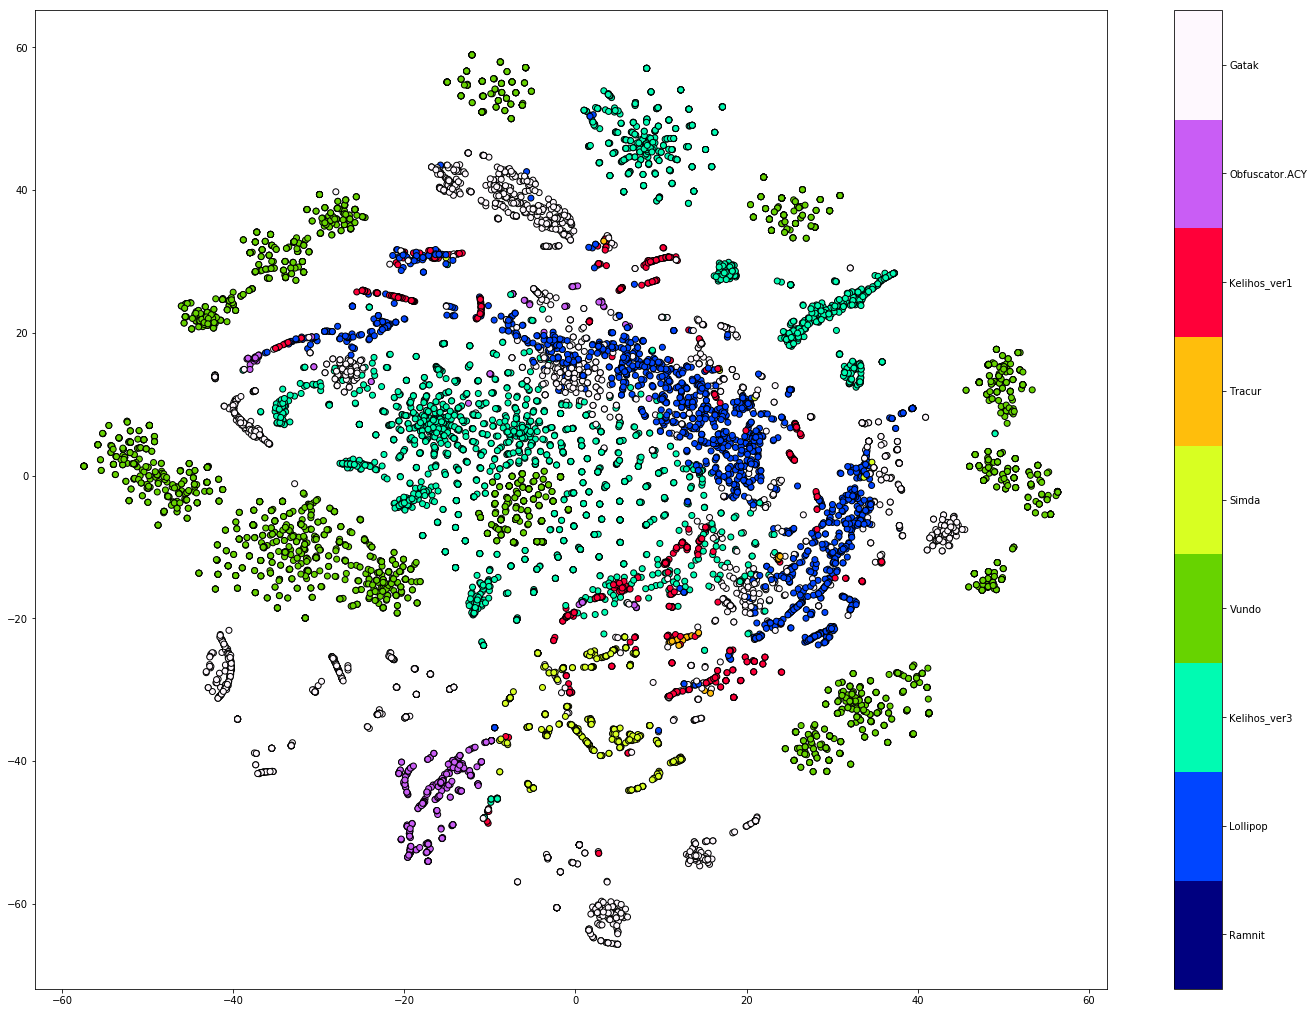

In [14]:
print("Plotting t-SNE ...")
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.scatter(vis_data[:, 0], vis_data[:, 1], c=y, cmap=plt.cm.get_cmap("gist_ncar", len(list_fams)),edgecolors="black")
plt.clim(-0.5, len(list_fams)-0.5)
cbar = plt.colorbar(ticks=range(len(list_fams)))
cbar.ax.set_yticklabels(list_fams)                     
plt.show()

In [15]:
# Create stratified k-fold subsets                                                                                                                                        
kfold = 10  # no. of folds                                                                 
skf = StratifiedKFold(kfold, shuffle=True,random_state=1)
skfind = [None] * kfold  # skfind[i][0] -> train indices, skfind[i][1] -> test indices
cnt = 0                                              
for index in skf.split(X, y):         
    skfind[cnt] = index                                                 
    cnt += 1 

In [16]:
# Training top_model and saving min training loss weights
conf_mat = np.zeros((len(list_fams),len(list_fams))) # Initializing the Confusion Matrix
for i in range(kfold):
    train_indices = skfind[i][0]
    test_indices = skfind[i][1]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    top_model = svm.LinearSVC()
    top_model.fit(X_train,y_train)  # Training
    y_pred = top_model.predict(X_test)  # Testing
    print("[%d] Test acurracy: %.4f" %(i,accuracy_score(y_test,y_pred)))
    cm = confusion_matrix(y_test,y_pred)  # Compute confusion matrix for this fold
    conf_mat = conf_mat + cm  # Compute global confusion matrix

[0] Test acurracy: 0.8901
[1] Test acurracy: 0.8826
[2] Test acurracy: 0.9127
[3] Test acurracy: 0.9098
[4] Test acurracy: 0.8896
[5] Test acurracy: 0.8895
[6] Test acurracy: 0.8978
[7] Test acurracy: 0.9070
[8] Test acurracy: 0.8809
[9] Test acurracy: 0.9012


In [17]:
# Computing the average accuracy
avg_acc = np.trace(conf_mat)/sum(no_imgs)
print("Average acurracy: %.4f" %(avg_acc))

Average acurracy: 0.8961


In [18]:
# Viewing the confusion matrix
conf_mat = conf_mat.T  # since rows and cols are interchangeable
conf_mat_norm = conf_mat/no_imgs  # Normalizing the confusion matrix

Plotting the confusion matrix


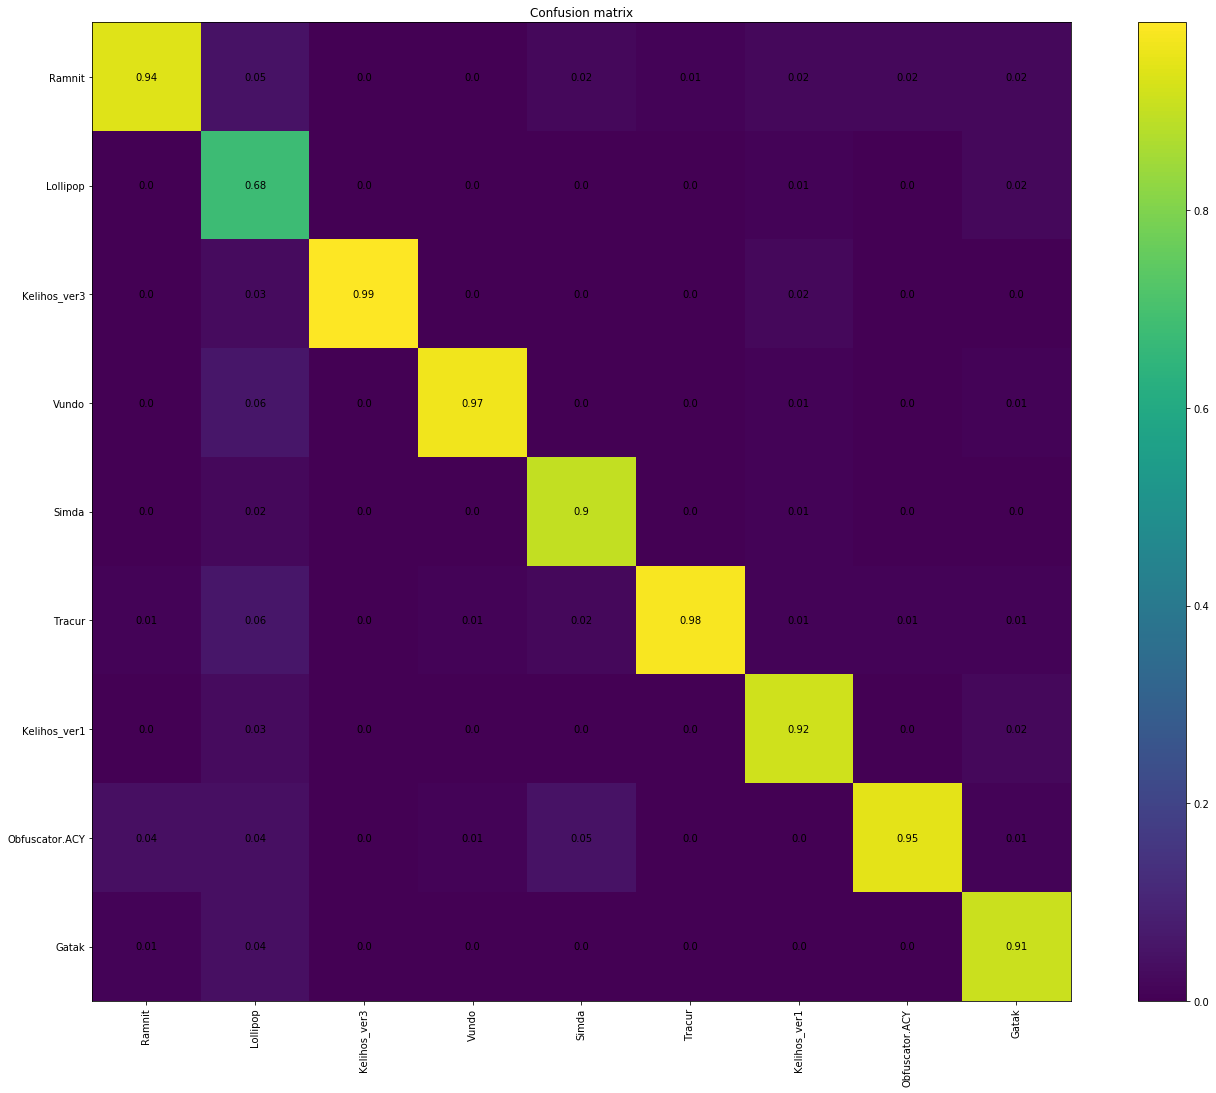

In [19]:
print("Plotting the confusion matrix")
conf_mat = np.around(conf_mat_norm,decimals=2)  # rounding to display in figure
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.imshow(conf_mat,interpolation='nearest')
for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]),xy=(col,row),ha='center',va='center')
plt.xticks(range(len(list_fams)),list_fams,rotation=90,fontsize=10)
plt.yticks(range(len(list_fams)),list_fams,fontsize=10)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()